# Distribución de Probabilidad Hipergeométrica
###### https://www.chreinvent.com/recursos/distribuci%C3%B3n-hipergeom%C3%A9trica
###### https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.hypergeom.html#scipy.stats.hypergeom
###### https://github.com/scipy/scipy/blob/v1.14.0/scipy/stats/_discrete_distns.py#L553-L698

In [2]:
import numpy as np
from scipy.stats import hypergeom
import matplotlib.pyplot as plt
import seaborn.objects as so

Los modelos de distribución hipergeométrica extraen objetos de un contenedor. 
+ M es el número total de objetos, (Población)
+ n es el número total de objetos de tipo I. 
+ La variable aleatoria representa el número de objetos de tipo I en N extraídos sin reemplazo de la población total.

In [3]:
# Funciones
# Funciones para imprimir parametros
def print_param(M, n, N):
    print(f"Población: {M}")
    print(f"Defecuosos: {n}")
    print(f"Muestra: {N}")

# Función para graficar distribuciones de probabilidad discreta

def plot_distri(x, y, x_label='x', y_label='y'):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(x, y, 'bo')
    ax.vlines(x, 0, y, lw=2)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    plt.show()

def DistPlot(x, quex, poblac, exito, muestra, pmf_x, cdf_x):
    caso = "Población: "+ str(M) + ", Defectuosas: "+ str(n) + ", Muestra: " + str(N) 
    fig = plt.Figure(figsize=(10, 5), layout="constrained")
    fig.suptitle(caso)
    sf1, sf2 = fig.subfigures(1, 2)
    p1= (
        so.Plot(x,pmf_x)
        .add(so.Bars(width=0.09, color='C0'))
        .add(so.Dot(color='C0'))
        .label(x=d_x, y="Prob.PMF")
        .on(sf1)

    )
    p2=(
        so.Plot(x,cdf_x)
        .add(so.Bars(width=0.09, color='C1'))
        .add(so.Dot(color='C1'))
        .label(x=d_x, y="Prob.CMF")
        .on(sf2)
        .plot(True)
    )
    return p1

# Función para imprimir probabilidades de la función de distribución.
def print_distri(x, probs):
    # 3.b Valores de x desde 0 hasta el valor buscado
    print(f"Valores de x  : {x}")
    # lista_redondeada = list(map(lambda x: round(x, 2), lista_original))
    # porque tiene numeros con muchos decimales
    n_x = list(map(lambda x: round(x, 2), probs))
    print(f"Probabilidades: {n_x}")

# Función para imprimir estadísticos de la función de distribución
def print_stats(objeto):
# Estadísticos de la función de distribución
    print(f"Estadisticos de la Distribución de Probabilidad:")
    print(f"Media: {objeto.mean()}, Dev.Std.: {objeto.std():.2f}, Mediana: {objeto.median()}")
    print(f"Intervalo de confianza del 95% alrededor de la mediana: {objeto.interval(0.95)}")

# Creación y configuración de la función de masa hipergeométrica
def DistHiper(M, n, N):
    # Parametros
    #   M Población
    #   n Cantidad piezas defectuosas en la muestra
    #   N Tamaño de la muestra
    print_param(M, n, N)
    
    # Función de distribución
    hyp = hypergeom(M, n, N)      # Creación de una instancia del objeto con los parametros

    # Creación de las distribuciones
    x = np.arange(0, N+1)          # Creación de x desde 0 hasta n
    pmf_x = hyp.pmf(x)            # Creación de una lista con los valores de probabilidad
    cdf_x = hyp.cdf(x)            # Creación de una lista con los valores de probabilidad acumulada

    # Valores de x desde 0 hasta el valor buscado. Y valores de probabilidad.
    print_distri(x, pmf_x)

    # Estadísticos de la función de distribución
    print_stats(hyp)

    # Gráfico
    return DistPlot(x, d_x, M, n, N, pmf_x, cdf_x)
  

## Control de calidad - Piezas con defectos - Tamaño de Muestra
+ Este es un ejercicio para ver como diseñar el tamaño de una muestra, para una población dada y conociendo la cantidad de piezas defectuosas
    + Supongamos que tenemos una población de 50 elementos, de los cuales 20 son defectuosos. 
        + Tamaño de la población: 50
        + Número de piezas defectuosas de la población: 20
        + Tamaño de la muestra: Cual es el óptimo de tamaño que nos permita en contrar al menos una pieza defectuosa.
+ Además queremos saber la probabilidad de encontrar "x" cantidad de defectuosos en la muestra.
    + Ver la probabilidad de encontrar x= 0, 1, 2,...,10 defectuosos, donde x varía desde cero hasta el tamaño de la muestra.
    + Por ejemplo la probabilidad de encontrar: Número de éxitos (defectuosos) en la muestra (x): 4
        + La probabilidad se calcula como: + P(4)=C(20,4) C(30,6)/C(50,10)

## Inicio del estudio
+ Para comenzar a trabajar primero definimos los parametros de la muestra
+ Luego definimos y vemos la función de probabilidad Hipergeométrica con los parametros del ejemplo.

In [4]:
# Parametros: Para usar Scipy debemos tener en cuenta que:
M = 50  # M: Ojetos totales    -> Población -> Piezas = 50.
n = 20  # n: Objetos Tipo 1    -> Exitos    -> Piezas defectuosas = 20.
N = 10  # N: Objetos extraídos -> Muestra   -> Piezas extraídas = 10.
x = np.arange(0, N+1)          # cantidad piezas defectuosas en la muestra.
d_x = "Cantidad de piezas defectuosas encontradas en la muestra" # Descripción de x para graficos.

##### Función de masa de probabilidad Hipergeométrica

Población: 50
Defecuosos: 20
Muestra: 10
Función de masa de probabilidad hipergeométrica: hypergeom(50, 20, 10) 
Objeto        : <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001942196FF20>
Valores de x  : [ 0  1  2  3  4  5  6  7  8  9 10]
Probabilidades: [0.0, 0.03, 0.11, 0.23, 0.28, 0.22, 0.1, 0.03, 0.01, 0.0, 0.0]
Estadisticos de la Distribución de Probabilidad:
Media: 4.0, Dev.Std.: 1.40, Mediana: 4.0
Intervalo de confianza del 95% alrededor de la mediana: (1.0, 7.0)


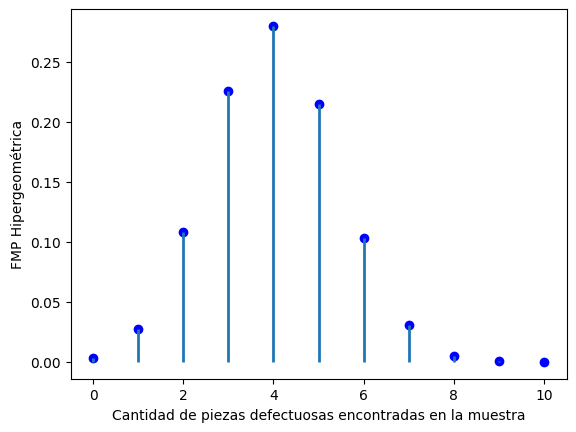

In [5]:
# Construcción de la función de masa de probabilidad con los parámetros dados

# Creación y configuración de la función de masa hipergeométrica
rv = hypergeom(M, n, N)      # Creación de una instancia del objeto con los parametros
pmf_x = rv.pmf(x)            # Creación de una lista con los valores de probabilidad

# Impresión de resultados
# Parametros
print_param(M, n, N)
# a Instancia del objeto
print(f"Función de masa de probabilidad hipergeométrica: hypergeom({M}, {n}, {N}) ")
print(f"Objeto        : {rv}")
# b Valores de la distribución para x desde 0 hasta el valor buscado. Y valores de probabilidad.
print_distri(x, pmf_x)

# Estadísticos de la función de distribución
print_stats(rv)

# 4. Gráfico
plot_distri(x,pmf_x, d_x, 'FMP Hipergeométrica')

##### Función de masa de probabilidad Hipergeométrica Acumulada

Función de masa de probabilidad hipergeométrica acumulada : hypergeom(M, n, N) cdf
Población: 50
Defecuosos: 20
Muestra: 10
Objeto        : <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001942196FF20>
Valores de x  : [ 0  1  2  3  4  5  6  7  8  9 10]
Probabilidades: [0.0, 0.03, 0.14, 0.36, 0.65, 0.86, 0.96, 0.99, 1.0, 1.0, 1.0]


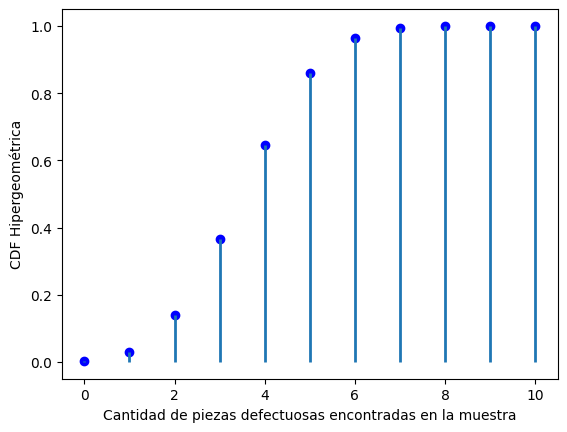

In [6]:
# Construcción de la función de probabilidad acumulada con los parámetros dados
print(f"Función de masa de probabilidad hipergeométrica acumulada : hypergeom(M, n, N) cdf")
print_param(M, n, N)

# Creación y configuración de la función de probabilidad acumulada hipergeométrica
# rv = hypergeom(M, n, N)     # Ya esta la, creación de una instancia del objeto con los parametros
cdf_x = rv.cdf(x)          # Creación de una lista con los valores de probabilidad de resultados

# Impresión de resultados
# a Instancia del objeto
print(f"Objeto        : {rv}")
# b Valores de x desde 0 hasta el valor buscado
print_distri(x, cdf_x)

# Gráfico
plot_distri(x,cdf_x, d_x, 'CDF Hipergeométrica')


Se ve que la probabilidad de encontrar al menos un defectuoso es muy baja.

In [7]:
# Por ejemplo, la cantidad de encontrar solo 1
print(f"Probabilidad de encontrar al menos un defectuoso:{rv.cdf(1)}") 


Probabilidad de encontrar al menos un defectuoso:0.03078070996202394


## Analisis del tamaño de la muestra
Para hacer una prueba más rigurosa para detectar defectuosos, se puede variar el tamaño de la muestra observar:
+ a. si el tamaño de al muestra es igual a 1  
+ b. si el tamaño de la muestra es igual a la población
+ c. si el tamaño de la muestra es igual a la cantidad de piezas defectuosas
+ d. si el tamaño de la muestra es igual a un valor intermedio de la población
+ e. si el tamaño de la muestra es igual a un valor intermedio de la cantidad de piezas defectuosas
* Finalmente se puede calcular el tamaño optimo (mínimo) de la muestra para encontrar por lo menos una pieza defectuosa.

### a. Tamaño de la muestra igual a 1

Población: 50
Defecuosos: 20
Muestra: 1
Valores de x  : [0 1]
Probabilidades: [0.6, 0.4]
Estadisticos de la Distribución de Probabilidad:
Media: 0.4, Dev.Std.: 0.49, Mediana: 0.0
Intervalo de confianza del 95% alrededor de la mediana: (0.0, 1.0)


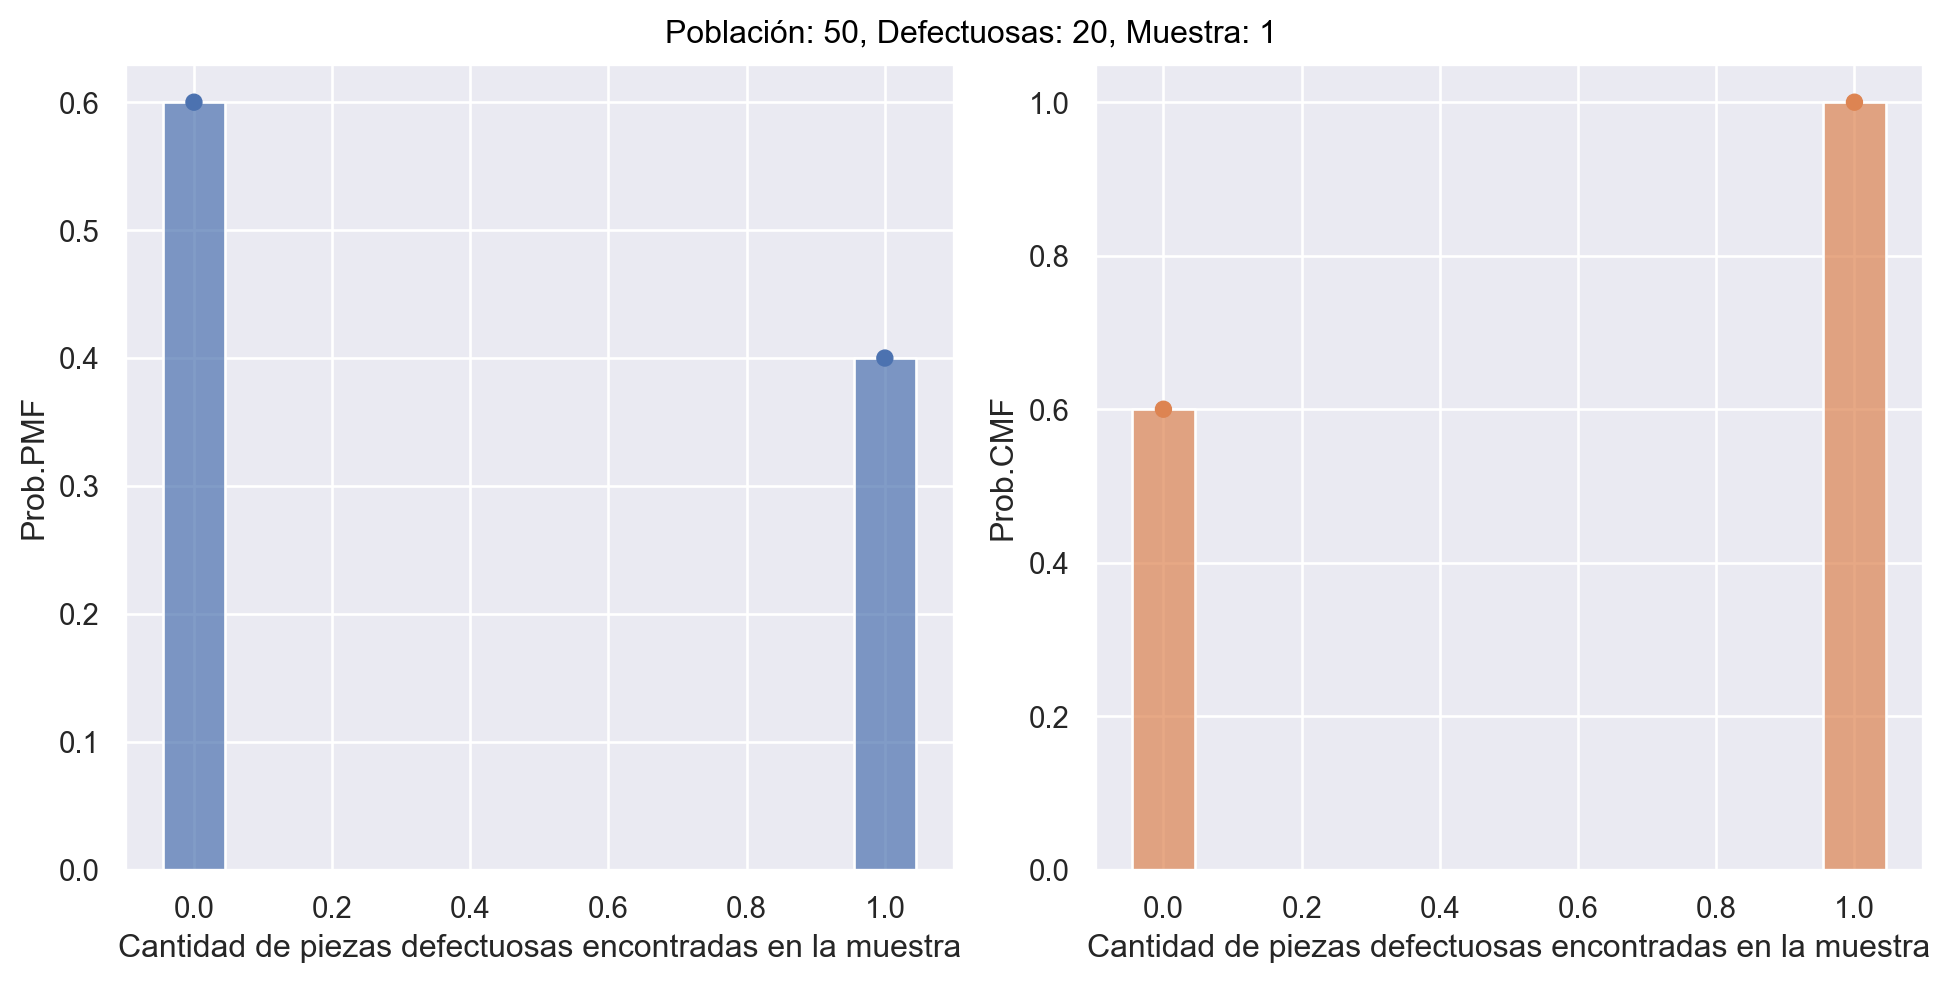

In [8]:
# Creación y configuración de la función de masa hipergeométrica
N=1
# Parametros
DistHiper(M, n, N)                      # (Población, Defecutosas, Muestra)

**Interpretación: Para una muestra de tamaño igual a 1:**
+ La distribución de masas de probabilidad nos dice:
  + La probabilidad de no encontrar una de las 20 piezas de las defectuosas en la muestra es alta (60%)
  + La probabilidad de encontrar exactamente una de las 20 piezas defectuosas es menor que la de no encontrar ninguna (40%)
+ La distribución de probabilidad acumulada nos dice:
  + No hay ninguna otra opción probable más que las dos mencionadas arriba es decir:
  + a. No encontrar ninguna defectuosa.
  + b. Si encontrar solo una defectuosa.
  + La suma de ambas probabilidades es igual a uno y agonta cualquier otra chance.
+ La media nos dice:
+ + El valor 0,4 nos indica que o no hay ninguna o hay 1 y no mas.
  + El valor 0,4 inclina las probabilidades hacia la probabilidad de 0 defectuosas. (sino sería 0,5)
+ La desviación estandard nos dice:
  + La variacion se produce en 0,49 para ambos lado pero, como el 0 está a 0 a 0,4 entonces, está mas cerca de no encontrarse nada.
+ La mediana nos dice:
  + Es más probable que salga 0 que 1.
  + Es más probablie que no se encuentre ninguna pieza defectuosa que que se encuentre una.
+ El intervalo de confianza nos dice:
  + El 95% de los valores están concentrados en 0 y 1 piezas defectuosas
  + Las probabilidades más altas de encontrar piezas defecuosas están entre 0 y 1 piezas defectuosas.
+ **Conclusión**:
  + **Si saco una sola muesta, lo más probale es que no encuentre ninguna pieza defectuosa.**

### b. Tamaño de la muestra igual a la población

Población: 50
Defecuosos: 20
Muestra: 50
Valores de x  : [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50]
Probabilidades: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Estadisticos de la Distribución de Probabilidad:
Media: 20.0, Dev.Std.: 0.00, Mediana: 20.0
Intervalo de confianza del 95% alrededor de la mediana: (20.0, 20.0)


c:\Users\Dani\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_discrete_distns.py:654: RuntimeWarning: divide by zero encountered in divide
  g2 /= n * N * (M - N) * m * (M - 2.) * (M - 3.)
c:\Users\Dani\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_discrete_distns.py:658: RuntimeWarning: divide by zero encountered in _hypergeom_skewness
  _boost._hypergeom_skewness(n, N, M),


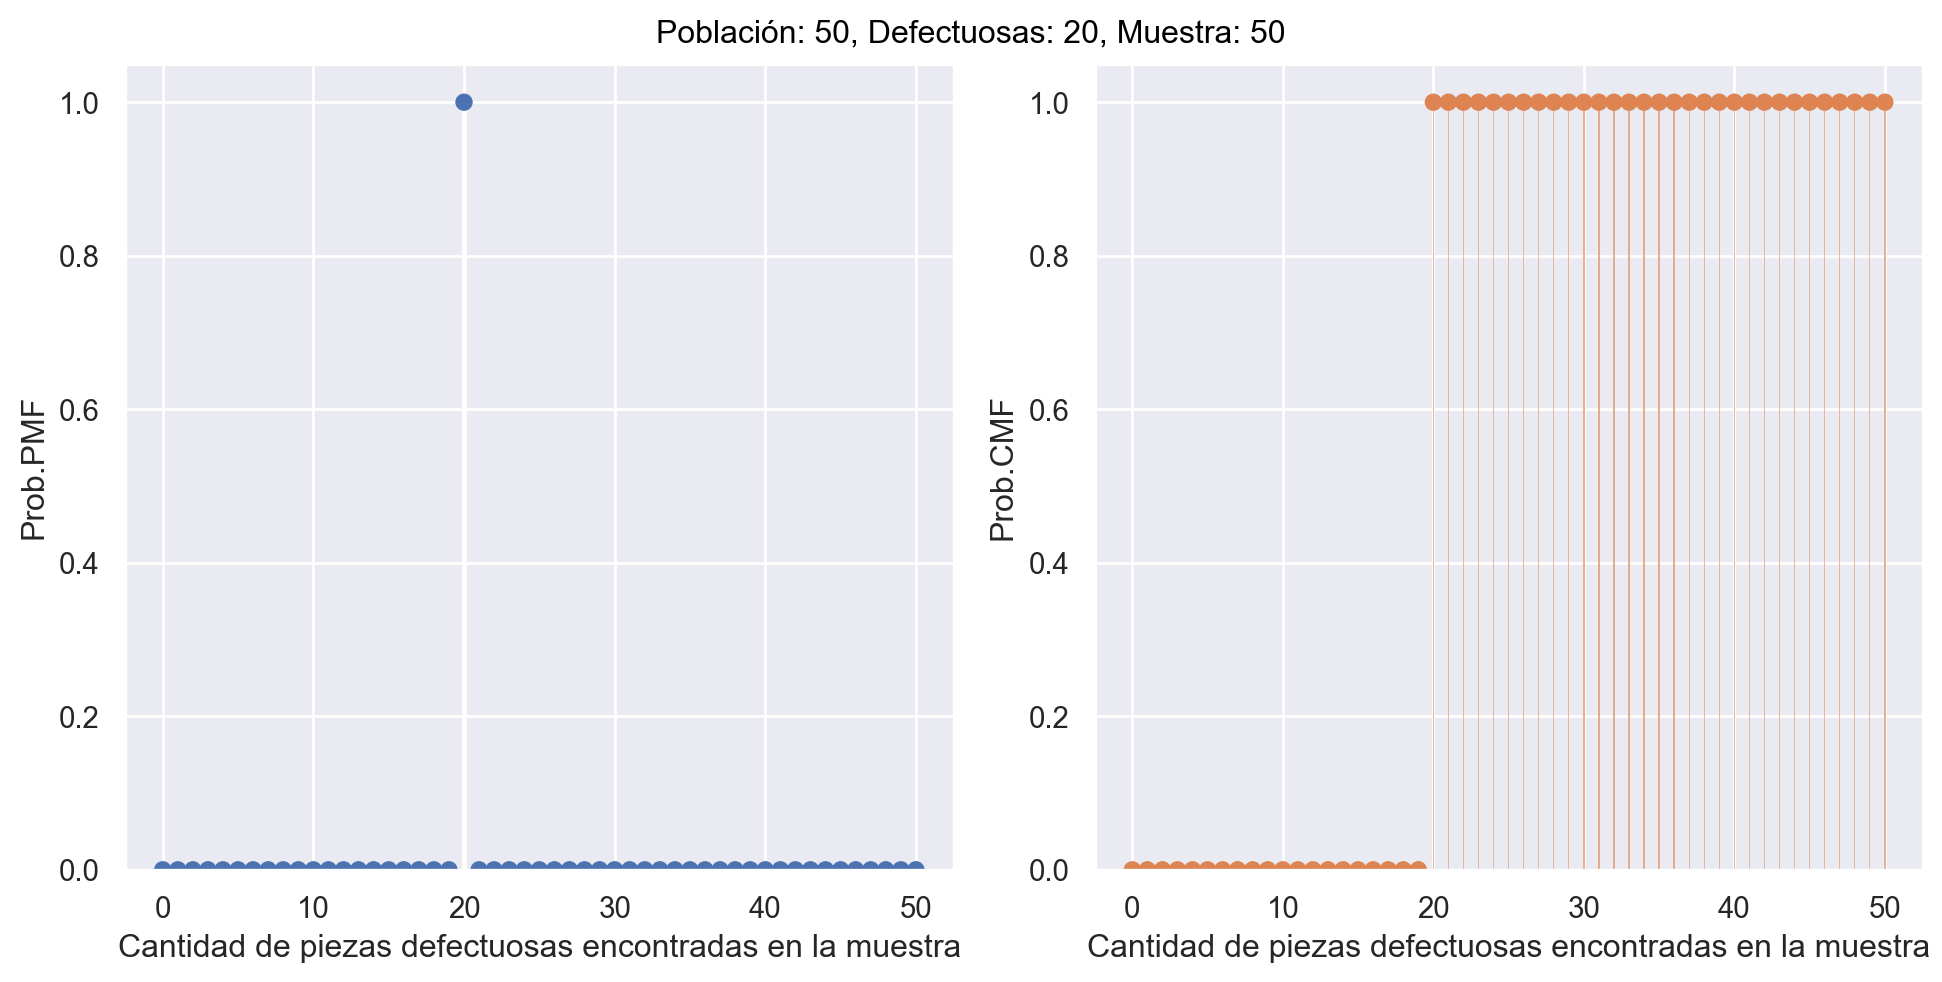

In [9]:
# Creación y configuración de la función de masa hipergeométrica
N=50
# Parametros
DistHiper(M, n, N)                      # (M:Población, n:Defecutosas, N:Muestra)

**Interpretación: Para una muestra de tamaño igual a 50, es decir igual a la población:**
+ La distribución de masas de probabilidad nos dice:
  + La probabilidad de no encontrar las **20** piezas de las defectuosas en la muestra un suceso seguro (**100%**)
  + Es claro que si observo toda la población, entonces, se van a encontrar todas las piezas defectuosas.
+ La distribución de probabilidad acumulada nos dice:
  + No hay ninguna otra opción probable más que las dos mencionadas arriba es decir:
  + a. La probabilidad de encontrar menos de las 20 piezas defetucosas es nula.
  + b. La probabilidad de encontrar todas las 20 piezas defectuosas es 100%
+ La media y la desviación estandard nos dice:
+ + La media es 20, igual a la cantidad de piezas defectuosas porque todas seran descubiertas.
  + El desvío de la media es cero, porque no hay opción que encontrar a todas.
+ La mediana nos dice:
  + La mediana es 20. A los costados estarían la mitad de los valores de un lado y de otro, que en ambos lados tiene una probabilidad cero.
  + La mediana es 20 porque es el único valor posible en la distribución, No hay posibilidad de que exista otro valor que no sea 20.
+ El intervalo de confianza nos dice:
  + El 100% de los valores están concentrados en exactamente 20 piezas defectuosas.
  + Al dividir por el desvío estandard que es cero el intervalo de confianza da error.
+ **Conclusión**:
  + **Si controlo toda la población, seguro que se encontrarán todas las piezas defectuosas**

### c. Tamaño de la muestra es igual a la cantidad de éxitos (igual a la cantidad de piezas defecutosas)

Población: 50
Defecuosos: 20
Muestra: 20
Valores de x  : [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
Probabilidades: [0.0, 0.0, 0.0, 0.0, 0.01, 0.05, 0.12, 0.2, 0.23, 0.19, 0.12, 0.05, 0.02, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Estadisticos de la Distribución de Probabilidad:
Media: 8.0, Dev.Std.: 1.71, Mediana: 8.0
Intervalo de confianza del 95% alrededor de la mediana: (5.0, 11.0)


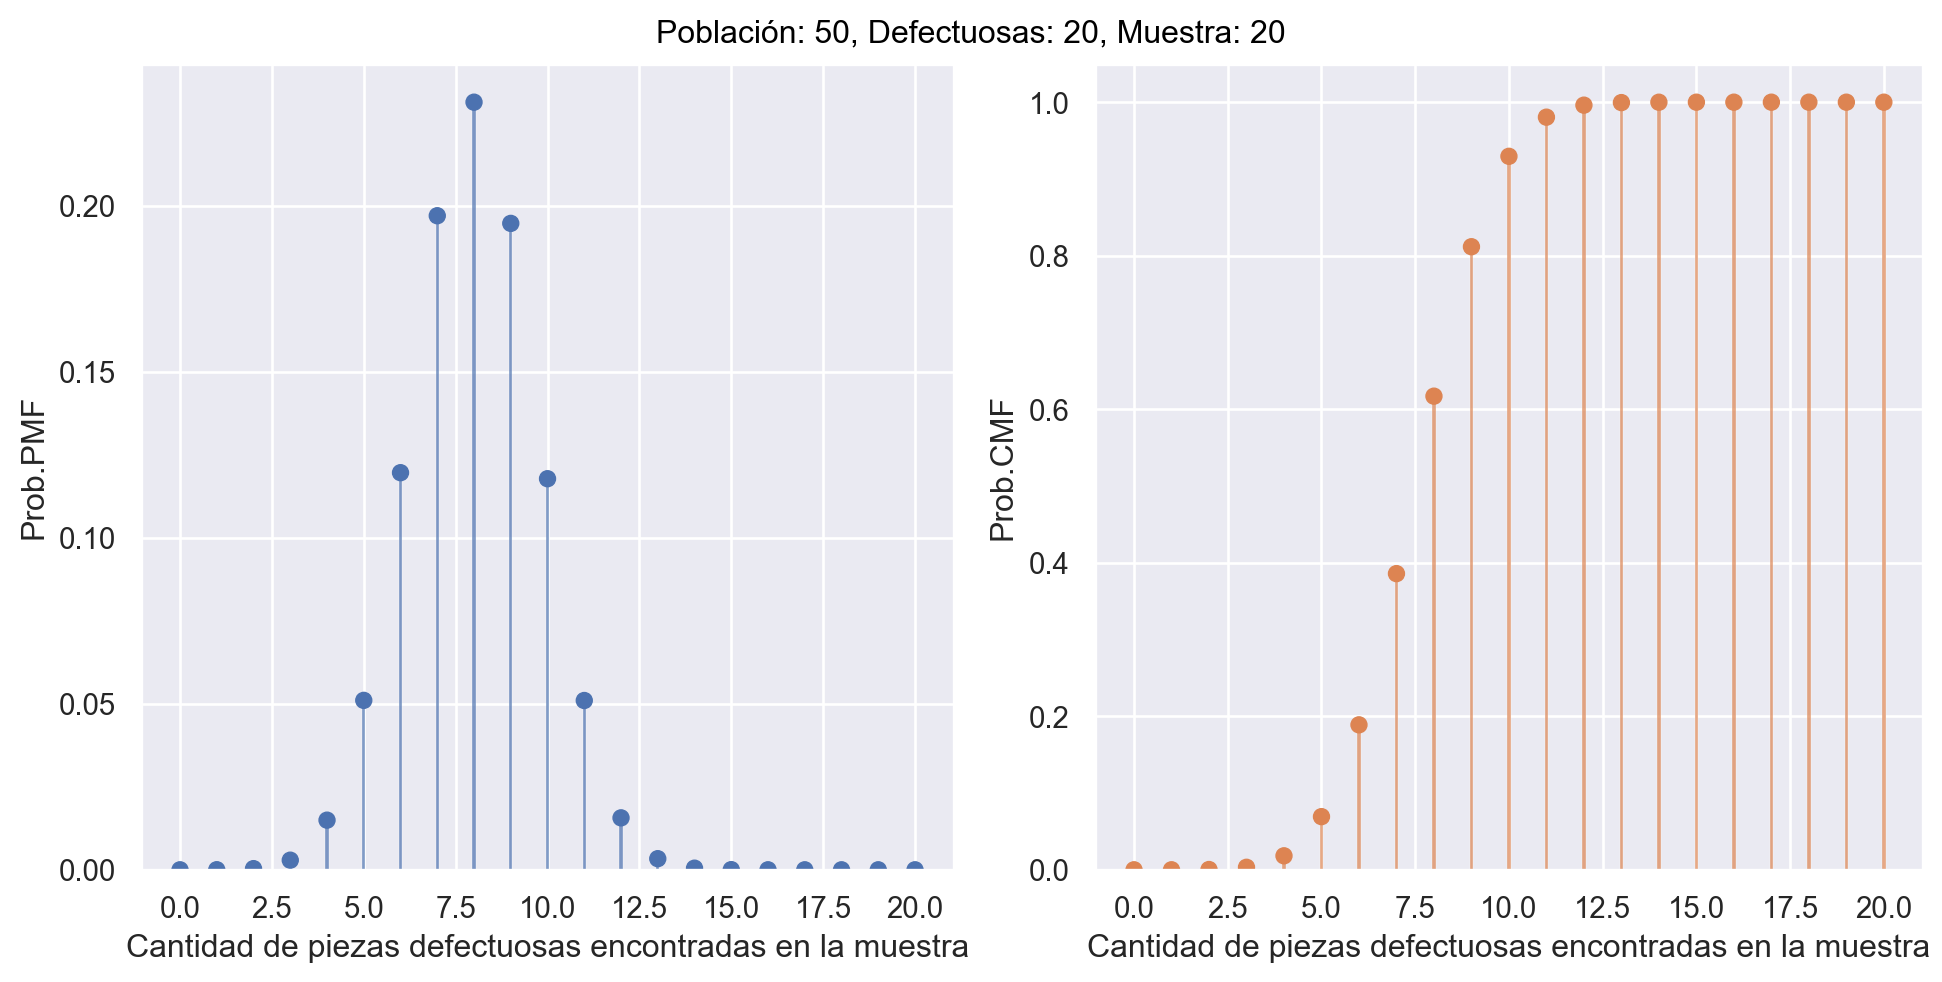

In [10]:
# Creación y configuración de la función de masa hipergeométrica
N=20
# Parametros
DistHiper(M, n, N)                      # (M:Población, n:Defecutosas, N:Muestra)

**Interpretación: Para una muestra de tamaño igual a la cantidad de éxitos (20 defectuosos)**
+ La distribución de masas de probabilidad nos dice:
  + Las probabilidades más altas están alrededor de 8
  + Significa que podré encontrar más o menos de 8. 
  + Podría decirse que entre 7 y 10 es la cantidad más probable de encontrar defectuosos dentro le la muestra.
+ La distribución de probabilidad acumulada nos dice:
  + Es mucho más probable encontrar más de 7 elementos defectuosos que menos que menos.
  + a. La probabilidad no encontrar ninguna defectuosa es cero.
  + b. La probabilidad de encontrar entre cero y tres defectosas es cero también.
+ La media y la desviación estandard nos dice:
+ + La media es 8, y es la cantidad de piezas defecuosas que es más probable que se encuentren.
  + El desvío de la media 1,7, porque podría ser que encuentre entre 6 y 10 aproximadamente.
+ La mediana nos dice:
  + La mediana es 20. A los costados estarían la mitad de los valores de un lado y de otro.
  + La mediana es igual a la media es decir que hay simetría en la probabilidades de encontrar más o menos de 8.
+ El intervalo de confianza nos dice:
  + El 95% de los valores están concentrados en exactamente en encontrar entre 5 y 11 piezas defectuosas.
+ **Conclusión**:
  + **Para una muestra de tamaño igual a la cantidad de éxitos (2) es my probable encontrar entre 5 y 11 piezas defectuosas**

### d. Tamaño de la muestra es igual un valor intermedio de la población
Por ejemplo el valor medio de la pobalción

Población: 50
Defecuosos: 20
Muestra: 25
Valores de x  : [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25]
Probabilidades: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.02, 0.05, 0.12, 0.19, 0.23, 0.19, 0.12, 0.05, 0.02, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Estadisticos de la Distribución de Probabilidad:
Media: 10.0, Dev.Std.: 1.75, Mediana: 10.0
Intervalo de confianza del 95% alrededor de la mediana: (7.0, 13.0)


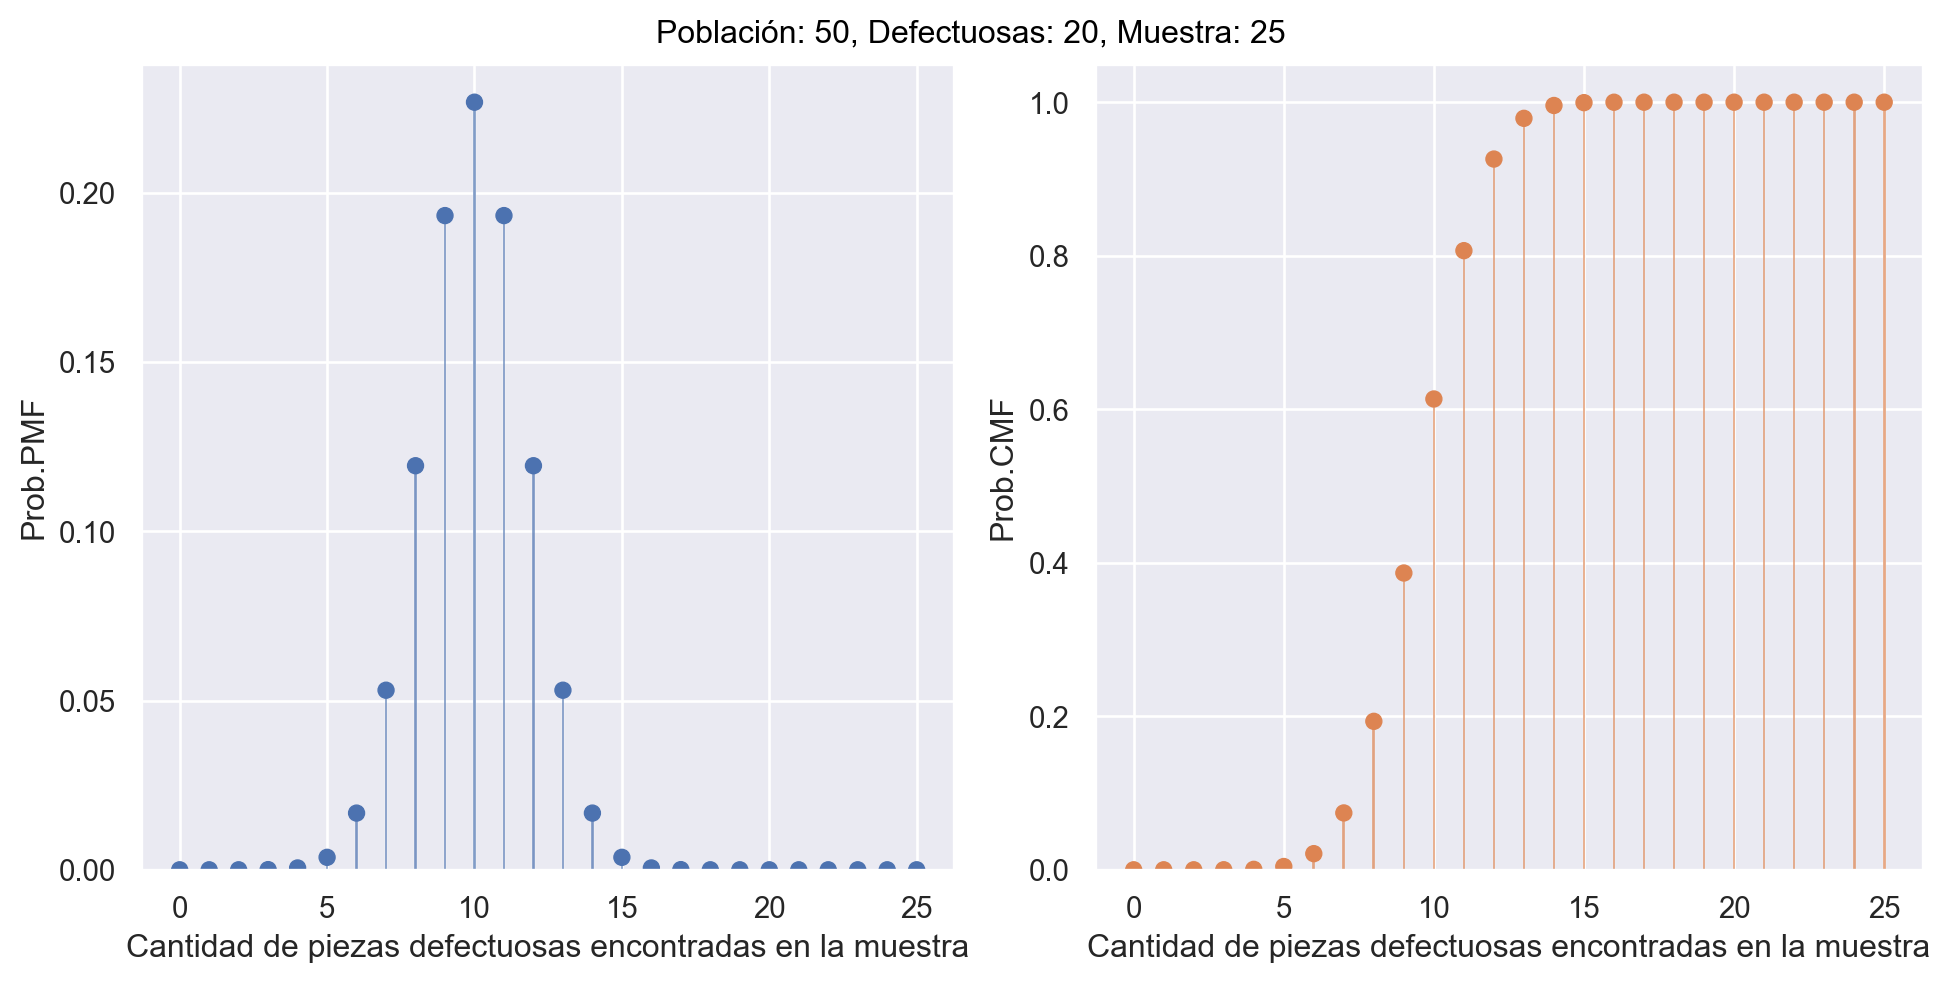

In [11]:
# Creación y configuración de la función de masa hipergeométrica
N=25
# Parametros
DistHiper(M, n, N)                      # (M:Población, n:Defecutosas, N:Muestra)

**Interpretación: Para una muestra de tamaño igual a la mitad de la poblacón (en este caso 25)**
+ Siguiendo la lógica de razonamiento se puede observar
  + El valor más probable de encontrar defectuosos está en encontrar 10 defectuosos
  + Los valores probales varían entre 7 y 10
  + Es más probable encontrar más de 6 que 5 o menos
  + Las probabilidades de encontrar de cero a seis piezas es practicamente cero
+ **Conclusión**:
  + **Una muestra de tamaño igual a la mitad de la población, debería contener piezas defectuosas**

### e. si el tamaño de la muestra es igual a un valor intermedio de la cantidad de piezas defectuosas
Por ejemplo la mitad

Población: 50
Defecuosos: 20
Muestra: 10
Valores de x  : [ 0  1  2  3  4  5  6  7  8  9 10]
Probabilidades: [0.0, 0.03, 0.11, 0.23, 0.28, 0.22, 0.1, 0.03, 0.01, 0.0, 0.0]
Estadisticos de la Distribución de Probabilidad:
Media: 4.0, Dev.Std.: 1.40, Mediana: 4.0
Intervalo de confianza del 95% alrededor de la mediana: (1.0, 7.0)


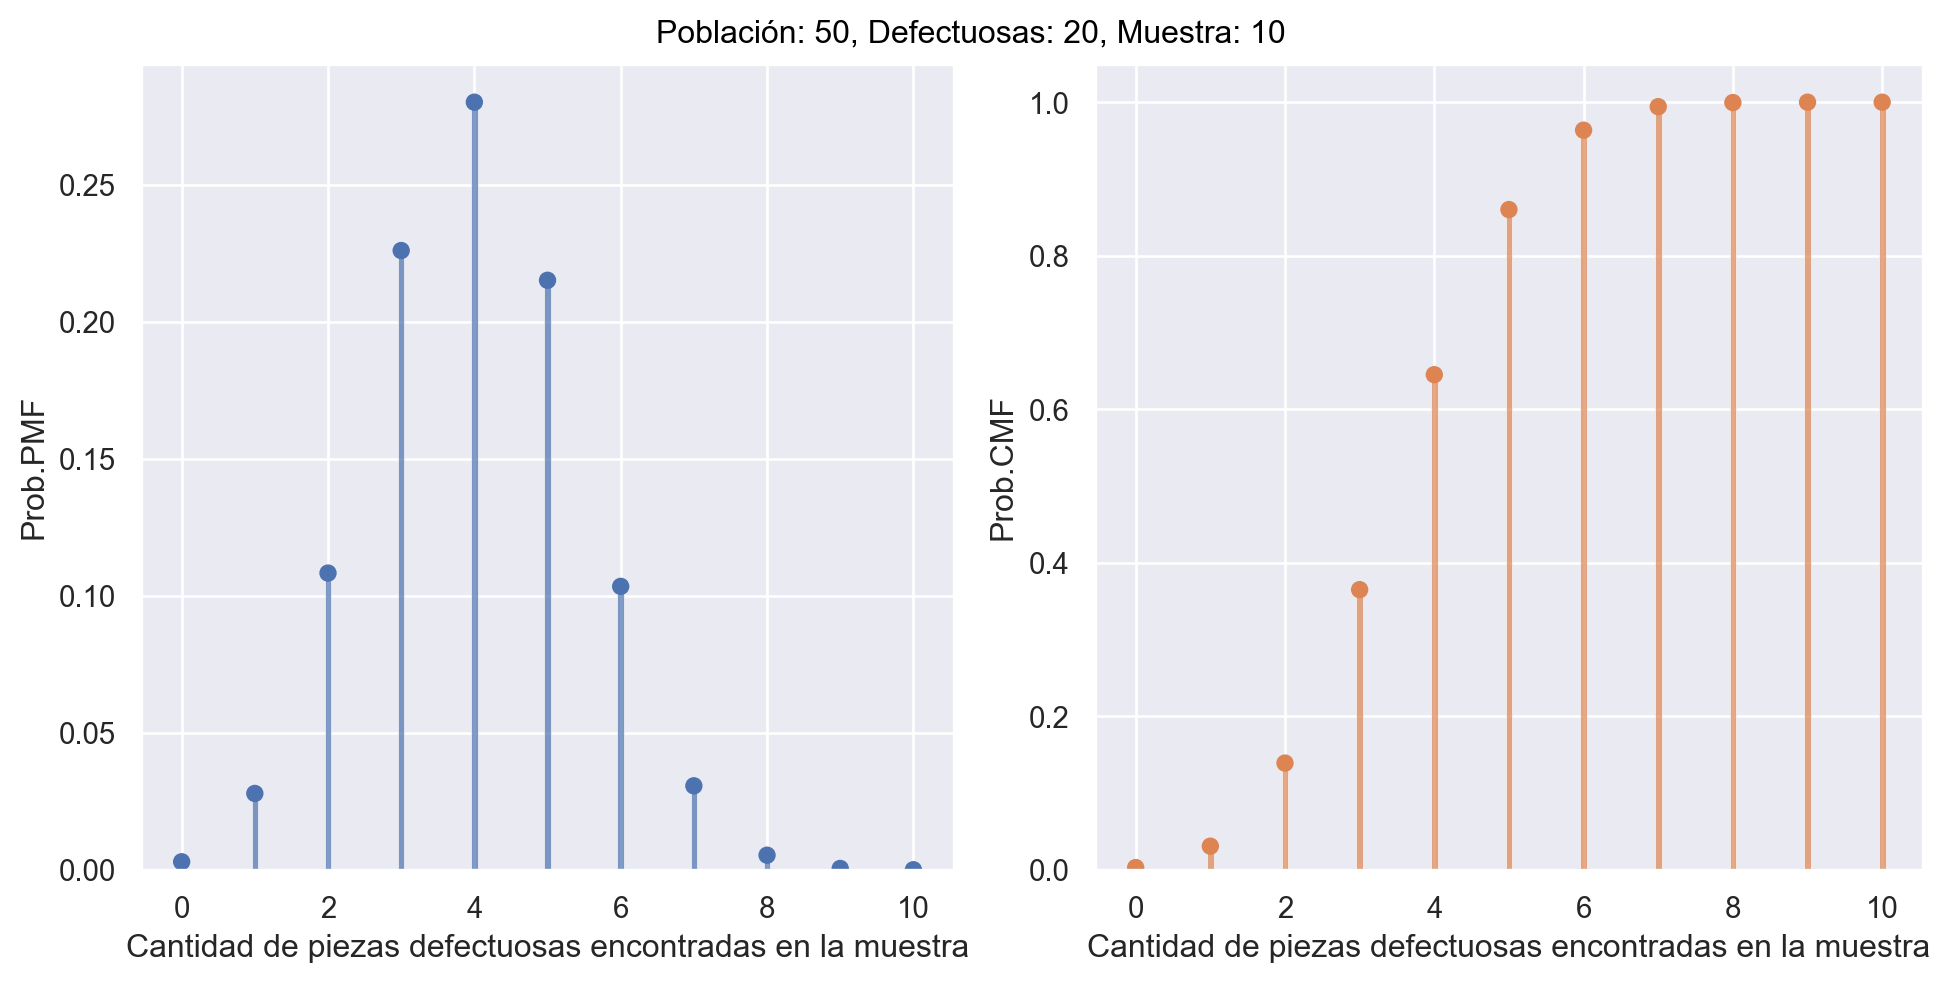

In [12]:
# Creación y configuración de la función de masa hipergeométrica
N=10
# Parametros
DistHiper(M, n, N)                      # (M:Población, n:Defecutosas, N:Muestra)

**Interpretación: Para una muestra de tamaño igual a la mitad de la cantidad de piezas defectuoas (en este caso 10)**
+ El valor más probable de encontrar defectuosos está en encontrar 4 defectuosos
+ Los valores probales varían entre 3 y 5 (se angosta el rango, pero sigue siendo una buena cantidad)
  + La distribución empieza a sesgarse hacia la derecha
    + Es más probable encontrar 3 que 5
+ Es más probable encontrar más de 1 que cero (ver acumulada)
+ La probabilidad de no econtrar ninguna pieza defectuosa en la muestra es cero.
+ La probabilidad de encontrar una o mas piezas defectuosas es un suceso "frecuente".
+ **Conclusión**:
  + **Una muestra de tamaño igual a 10 para este excenario parece ser el tamaño ideal para encontrar piezas defectuosas.**

### Cálculo del tamaño de la muestra optimo
+ El tamaño optimo de la muestra es el tamaño mínimo que asegure que:
    + se va a encontrar al menos una pieza defectuosa dentro de la muestra.
    + no es posible que en la muestra esten todos los elementos bien (sin defectos).

#### Cálculo
+ Definimos un nivel de confianza del 99.7% (1-0,003)
+ Realizamos los cálculos

In [16]:
# Para cada tamaño de la muestra desde 50 hasta 1
    # 1. crear una instancia de la distribución geométrica
    # 2. obtener los valores de probabilidad
    # 3. fijarse si el valor de probabilidad para x igual cero es cero
    # 4. si es cero almacenar el valor de la iteración en una lista
M = 50
n= 20
N = 31
n_c = 0.003
List_N_O = []
i= N
for i in range(M, 0, -1):           # 0. Para cada tamaño de la muestra desde 50 hasta 1
    hyp = hypergeom(M, n, i)        # 1. Crear una instancia de la distribución hipergeométrica
    p = hyp.pmf(0)                  # 2. Obtener los valores de probabilidad
    if p <= n_c:                  # 3. Definir y controlar el límite de confianza para encontrar el tamaño de la muestra
                                    # print(f"si, {M}, {n}, {i},  {p}")     # Ver si cumple
        List_N_O.append(i)          # Si cumple el nivel de confianza lo agrego a la lista de los N que cumplen
                                    # else:
                                    # print(f"no, {M}, {n}, {i},  {p:.4f}")  # Ver si no cumple
# Datos concluyentes
tam_min_muestra = min(List_N_O)
hyp = hypergeom(M, n, tam_min_muestra)
p0 = hyp.pmf(0)
p_al_menos1 = 1- hyp.pmf(1)

# Impresión de resutlados
print(f"El tamaño de la muestra mínimo y optimo es: {tam_min_muestra}")
print(f"La probabilidad de no incontrar ningún elemento defectuosos dentro de la muestra es: {p0}")
print(f"La probabilidd de encontrar uno o más elementos dentro de la muestra es: {p_al_menos1}")
print(f"El nivel de confianza de esto es: {(1-n_c)*100}%")

El tamaño de la muestra mínimo y optimo es: 10
La probabilidad de no incontrar ningún elemento defectuosos dentro de la muestra es: 0.002924863842545261
La probabilidd de encontrar uno o más elementos dentro de la muestra es: 0.9721441538805213
El nivel de confianza de esto es: 99.7%
